# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [142]:
import pandas as pd
import numpy as np
import random

In [143]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [148]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [149]:
# parameter 개수
N = len(X_train.loc[0])

In [150]:
N

3

In [151]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.62384804, 0.44459787, 0.46164952])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [152]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += np.dot(X[i], parameters[i])
    return z

In [153]:
#test!
xx = np.array([[1,1,1]])
p = np.array([1])
dot_product(xx,p)

array([1, 1, 1])

In [154]:
dot_product(X_train.iloc[1], parameters)

1.1712441312275954

In [155]:
X_train.iloc[1]

bias          1.000000
experience    1.185555
salary        0.043974
Name: 1, dtype: float64

## Logistic Function

## $p = "{1 \over1+e^{-X_i\theta}}"$

In [156]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p =  1+np.exp(1)**-z
    return 1/p

In [157]:
logistic(X_train.iloc[1], parameters)

0.763369824666022

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma\{y_ilogp(X_i)+(1-y_i)log(1-p(X_i))\}$
## $     = - \Sigma\{y_iX_i\theta - log(1+e^{X_i\theta})\}$

In [179]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y*(np.log(p)) - (1-y)*(np.log(1-p)))
    return loss

In [180]:
#linear regression cost function
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = (y - y_hat)**2
    return loss

In [181]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/X_set.shape[0] #loss 평균값으로 계산
    return loss

In [182]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

-0.9795781061994577

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=\Sigma(y_i - \theta^TX_i)X_{ij}$ 
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)X_{ij}$

In [188]:
def get_gradient_ij(X, y, parameters, j, model): # 데이터 하나(i)의 한 계수(j)에 대한 편미분 값
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = (y - y_hat)*X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y-p)*X[j]
    return gradient

In [185]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

0.08570734090500352

In [189]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

0.15485143603936488

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [190]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model) 
    return gradients

In [191]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[-52.26044205715597, -6.067355516819472, -37.91925140231375]

In [192]:
gradients2 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients2

[-50.57536850524622, -99.22373535945218, -132.01012017102656]

## mini-batch
인덱스로 미니 배치 나누기

In [171]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
##### 설명: data를 batch_size 만큼 인덱스를 떼내서 반환해주는 함수입니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [193]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)): 
        parameters[i] += learning_rate*gradients[i]/n
    return parameters

In [194]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.61368509, 0.44122395, 0.45603825])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 모든 train data를 학습하는 것
- num_epoch: 에폭 수
<br>

BGD: batch gradient descent 학습 한 번에 모든 데이터셋에 대해 기울기를 구한다.

SGD: stochastic gradient descent 학습 한 번에 랜덤으로 선택한 하나의 데이터에 대한 기울기를 구한다.

MGD: mini batch gradient descent 전체 데이터의 일부(배치)에 대해 기울기를 구한다.

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요 

batch_size=1 -> SGD 

batch_size=k -> MGD  

batch_size=whole -> BGD  

In [202]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                print('break')
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {-new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [209]:
# learning_rate = 0.1
new_param_bgd1 = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.000001, model = 'logistic', batch_size = 16)
new_param_bgd1

epoch: 0  loss: 1.0923811829912407  params: [0.50373879 0.39083668 0.25178703]  gradients: [-3.5584285242147824, -3.211632674400558, -4.098629582650231]
epoch: 100  loss: 0.07596272750064754  params: [-1.56005057  3.06645742 -3.01420332]  gradients: [-0.4447517530475609, -0.6550196680031499, -0.8719036848810479]
epoch: 200  loss: 0.07400304271970876  params: [-1.77324997  3.74516464 -3.65495873]  gradients: [-0.4183425078710976, -0.6337595596546741, -0.7842769670390735]
epoch: 300  loss: 0.07352257435391395  params: [-1.86812649  4.04197175 -3.93273214]  gradients: [-0.4113250893566607, -0.6266882467282522, -0.7532786211210689]
epoch: 400  loss: 0.07334224994194881  params: [-1.91609393  4.19118734 -4.07184383]  gradients: [-0.4085670994399378, -0.6235467137483407, -0.7391174895008442]
break


array([-1.9243604 ,  4.22971122, -4.08459784])

In [210]:
# learning_rate = 0.05
new_param_bgd2 = gradient_descent(X_train, y_train, learning_rate = 0.05, num_epoch = 1000, tolerance = 0.000001, model = 'logistic', batch_size = 30)
new_param_bgd2

epoch: 0  loss: 0.7612554549256594  params: [0.87032538 0.09477383 0.29438351]  gradients: [-11.500423394434893, -2.5320549448379084, -10.458957885849903]
epoch: 100  loss: -0.04623642479861075  params: [-1.07999086  1.56330304 -1.47764531]  gradients: [0.523609214596977, 0.14761631219599397, -3.008011470251158]
epoch: 200  loss: -0.00732114498987867  params: [-1.27798391  2.30020854 -2.19021865]  gradients: [0.1285643611276563, -0.20694264856625744, -2.060563150528451]
epoch: 300  loss: 0.015227539517493265  params: [-1.40671286  2.74934061 -2.61896976]  gradients: [-0.1478353794622209, -0.3707214322761336, -1.6329775421376194]
epoch: 400  loss: 0.03007713749676509  params: [-1.49864938  3.05956082 -2.91259214]  gradients: [-0.33767112076766304, -0.4642626997141883, -1.3868005350743144]
epoch: 500  loss: 0.040708508793087766  params: [-1.56742762  3.2881713  -3.12767397]  gradients: [-0.47539898291157934, -0.5248312162583518, -1.2263100802283564]
epoch: 600  loss: 0.0486925039953719  

array([-1.74609006,  3.87359876, -3.67363248])

In [211]:
# learning rate = 0.03
new_param_bgd3 = gradient_descent(X_train, y_train, learning_rate = 0.03, num_epoch = 1000, tolerance = 0.000000001, model = 'logistic', batch_size = 30)
new_param_bgd3

epoch: 0  loss: 0.8586078869765809  params: [0.74259206 0.50280173 0.9284522 ]  gradients: [-10.608733428370135, -5.851366692483692, -14.780034982357149]
epoch: 100  loss: -0.0653869835520784  params: [-0.92847093  1.04528697 -0.96593361]  gradients: [0.5198582992945531, 0.412834776867035, -3.9463835671403067]
epoch: 200  loss: -0.03888384605590678  params: [-1.12239549  1.71659089 -1.62589911]  gradients: [0.4659048048908535, 0.07159844866372747, -2.7759741496442256]
epoch: 300  loss: -0.014724965477965412  params: [-1.2399314   2.16129373 -2.05604361]  gradients: [0.21342592090454698, -0.14471552685128114, -2.2089325329775606]
epoch: 400  loss: 0.0020543948944144945  params: [-1.33048742  2.48543425 -2.36691745]  gradients: [0.015380285365443419, -0.2758787068959043, -1.8692353033648712]
epoch: 500  loss: 0.014491438142453478  params: [-1.40288729  2.73582005 -2.6055062 ]  gradients: [-0.1386656068069541, -0.3634241952580114, -1.6415625853534266]
epoch: 600  loss: 0.02418383170496456

array([-1.61857635,  3.45684673, -3.28511863])

### Predict Label

In [212]:
# learning rate = 0.03
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd3)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [213]:
from sklearn.metrics import *

In [214]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 2,  8]], dtype=int64)

In [215]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.92


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [216]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [217]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [218]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.87084815, 2.21548779])

In [221]:
#경사하강법
new_param = gradient_descent(X, y,learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'linear', batch_size = 10)
new_param

epoch: 0  loss: -1.2944219024745114  params: [1.24726297 0.92358104]  gradients: [2.1866792771989236, 2.9993373124442204]
epoch: 100  loss: -0.9043725724734173  params: [0.83464073 2.18713998]  gradients: [0.0532527665305107, 0.9108744791014467]
epoch: 200  loss: -0.9043579650836577  params: [0.83459725 2.18722318]  gradients: [0.053298120004275695, 0.9108251817621618]
epoch: 300  loss: -0.9043579640388438  params: [0.83459725 2.18722319]  gradients: [0.05329812324837668, 0.9108251782359544]
epoch: 400  loss: -0.90435796403877  params: [0.83459725 2.18722319]  gradients: [0.05329812324861116, 0.9108251782357079]
epoch: 500  loss: -0.90435796403877  params: [0.83459725 2.18722319]  gradients: [0.05329812324861116, 0.9108251782357079]
epoch: 600  loss: -0.90435796403877  params: [0.83459725 2.18722319]  gradients: [0.05329812324861116, 0.9108251782357079]
epoch: 700  loss: -0.90435796403877  params: [0.83459725 2.18722319]  gradients: [0.05329812324861116, 0.9108251782357079]
epoch: 800 

array([0.83459725, 2.18722319])

In [222]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

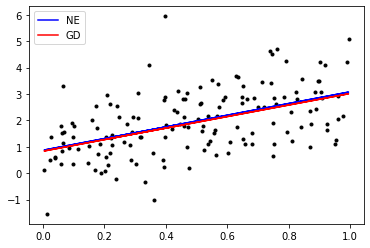

In [224]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()